In [1]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#from sklearn.svm import SVR
from catboost import CatBoostRegressor


from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from matplotlib import pyplot
import seaborn as sns


In [2]:
# Basic Ordinal Encoded Dataset for Non-Linear Models
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

In [3]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# list of other models to evaluate

def get_models():
    models = dict()
    #models['rf no bs'] = RandomForestRegressor(bootstrap=False) 
    #models['rf w bs'] = RandomForestRegressor(bootstrap=True) 
    models['gradient boost'] = GradientBoostingRegressor()
    models['Xtreme GB'] = XGBRegressor()
    models['CatBoost'] = CatBoostRegressor()
    #models['svm'] = SVR()
    return models

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
models = get_models()

In [8]:
#Create List of Dictionaries to evalute models

dfs = list()

for name, model in models.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs.append(df)

Learning rate set to 0.04591
0:	learn: 72361.9218076	total: 62.9ms	remaining: 1m 2s
1:	learn: 70332.1122794	total: 68ms	remaining: 33.9s
2:	learn: 68243.5129520	total: 74.5ms	remaining: 24.8s
3:	learn: 66277.1510470	total: 86.4ms	remaining: 21.5s
4:	learn: 64275.0838008	total: 91ms	remaining: 18.1s
5:	learn: 62297.7550168	total: 101ms	remaining: 16.7s
6:	learn: 60501.4784265	total: 108ms	remaining: 15.3s
7:	learn: 58780.6433672	total: 115ms	remaining: 14.2s
8:	learn: 57056.8296624	total: 123ms	remaining: 13.5s
9:	learn: 55598.5151565	total: 127ms	remaining: 12.6s
10:	learn: 54118.0677107	total: 132ms	remaining: 11.9s
11:	learn: 52662.4124562	total: 138ms	remaining: 11.3s
12:	learn: 51273.6970236	total: 147ms	remaining: 11.2s
13:	learn: 49893.8428278	total: 156ms	remaining: 11s
14:	learn: 48675.2313296	total: 166ms	remaining: 10.9s
15:	learn: 47403.1618021	total: 170ms	remaining: 10.5s
16:	learn: 46328.7428902	total: 174ms	remaining: 10.1s
17:	learn: 45257.5579224	total: 179ms	remaining

Learning rate set to 0.04591
0:	learn: 72862.9878624	total: 69.4ms	remaining: 1m 9s
1:	learn: 70794.3752149	total: 75.9ms	remaining: 37.9s
2:	learn: 68781.3275940	total: 80.8ms	remaining: 26.9s
3:	learn: 66728.5179497	total: 87.9ms	remaining: 21.9s
4:	learn: 64749.4127706	total: 96.4ms	remaining: 19.2s
5:	learn: 62775.8300238	total: 104ms	remaining: 17.2s
6:	learn: 60957.4703321	total: 108ms	remaining: 15.3s
7:	learn: 59289.0162795	total: 113ms	remaining: 14s
8:	learn: 57593.1727419	total: 120ms	remaining: 13.2s
9:	learn: 56103.9138329	total: 125ms	remaining: 12.4s
10:	learn: 54763.9278939	total: 130ms	remaining: 11.7s
11:	learn: 53485.5512819	total: 135ms	remaining: 11.2s
12:	learn: 52194.9797755	total: 143ms	remaining: 10.9s
13:	learn: 50951.5618389	total: 156ms	remaining: 11s
14:	learn: 49698.3732652	total: 160ms	remaining: 10.5s
15:	learn: 48362.5875588	total: 167ms	remaining: 10.3s
16:	learn: 47280.2056974	total: 172ms	remaining: 9.96s
17:	learn: 46167.1358581	total: 178ms	remaini

Learning rate set to 0.04591
0:	learn: 73609.0377202	total: 61.7ms	remaining: 1m 1s
1:	learn: 71255.2659266	total: 66.8ms	remaining: 33.4s
2:	learn: 69191.6488640	total: 72.4ms	remaining: 24s
3:	learn: 67234.1689675	total: 79.1ms	remaining: 19.7s
4:	learn: 65272.9999174	total: 83.5ms	remaining: 16.6s
5:	learn: 63493.5865455	total: 95.9ms	remaining: 15.9s
6:	learn: 61552.0308730	total: 103ms	remaining: 14.6s
7:	learn: 59950.9858789	total: 109ms	remaining: 13.5s
8:	learn: 58413.0369268	total: 124ms	remaining: 13.7s
9:	learn: 56864.1594379	total: 129ms	remaining: 12.8s
10:	learn: 55270.1506356	total: 157ms	remaining: 14.1s
11:	learn: 53683.9817271	total: 164ms	remaining: 13.5s
12:	learn: 52282.2998638	total: 169ms	remaining: 12.8s
13:	learn: 50926.6725132	total: 177ms	remaining: 12.5s
14:	learn: 49657.3841763	total: 196ms	remaining: 12.8s
15:	learn: 48411.3634115	total: 207ms	remaining: 12.7s
16:	learn: 47267.0927435	total: 224ms	remaining: 12.9s
17:	learn: 46224.0055093	total: 228ms	rema

149:	learn: 16569.0541103	total: 1.22s	remaining: 6.91s
150:	learn: 16531.9734973	total: 1.23s	remaining: 6.89s
151:	learn: 16480.0684408	total: 1.24s	remaining: 6.9s
152:	learn: 16426.2925541	total: 1.24s	remaining: 6.87s
153:	learn: 16391.6362013	total: 1.25s	remaining: 6.89s
154:	learn: 16347.1851813	total: 1.26s	remaining: 6.86s
155:	learn: 16315.0562365	total: 1.27s	remaining: 6.89s
156:	learn: 16277.1730655	total: 1.28s	remaining: 6.9s
157:	learn: 16245.3193308	total: 1.3s	remaining: 6.96s
158:	learn: 16221.9862591	total: 1.31s	remaining: 6.93s
159:	learn: 16180.9287978	total: 1.32s	remaining: 6.94s
160:	learn: 16147.0509096	total: 1.33s	remaining: 6.91s
161:	learn: 16124.1911951	total: 1.33s	remaining: 6.88s
162:	learn: 16096.5016462	total: 1.34s	remaining: 6.87s
163:	learn: 16072.0558077	total: 1.35s	remaining: 6.9s
164:	learn: 16054.2524222	total: 1.36s	remaining: 6.87s
165:	learn: 16012.3918750	total: 1.36s	remaining: 6.84s
166:	learn: 15964.0751492	total: 1.38s	remaining: 6.

Learning rate set to 0.04591
0:	learn: 72780.6436381	total: 67.5ms	remaining: 1m 7s
1:	learn: 70654.5276925	total: 75ms	remaining: 37.4s
2:	learn: 68556.1718975	total: 83.1ms	remaining: 27.6s
3:	learn: 66651.1580279	total: 88.1ms	remaining: 21.9s
4:	learn: 64686.7454772	total: 96.6ms	remaining: 19.2s
5:	learn: 62788.2026660	total: 105ms	remaining: 17.4s
6:	learn: 60939.9560276	total: 113ms	remaining: 16s
7:	learn: 59265.5222303	total: 121ms	remaining: 15s
8:	learn: 57563.6535653	total: 128ms	remaining: 14.1s
9:	learn: 56155.7098426	total: 137ms	remaining: 13.6s
10:	learn: 54687.7047002	total: 144ms	remaining: 12.9s
11:	learn: 53292.5853388	total: 154ms	remaining: 12.7s
12:	learn: 52006.5025454	total: 167ms	remaining: 12.7s
13:	learn: 50728.7680201	total: 178ms	remaining: 12.5s
14:	learn: 49537.8231907	total: 189ms	remaining: 12.4s
15:	learn: 48254.5788747	total: 195ms	remaining: 12s
16:	learn: 47186.2856587	total: 204ms	remaining: 11.8s
17:	learn: 46134.4982183	total: 223ms	remaining: 

296:	learn: 12675.6855707	total: 2.27s	remaining: 5.38s
297:	learn: 12661.5619531	total: 2.28s	remaining: 5.36s
298:	learn: 12650.6633911	total: 2.28s	remaining: 5.34s
299:	learn: 12632.6214397	total: 2.28s	remaining: 5.33s
300:	learn: 12611.7888223	total: 2.29s	remaining: 5.31s
301:	learn: 12578.9143125	total: 2.29s	remaining: 5.3s
302:	learn: 12555.8997948	total: 2.29s	remaining: 5.28s
303:	learn: 12523.7267891	total: 2.3s	remaining: 5.27s
304:	learn: 12489.7117362	total: 2.31s	remaining: 5.25s
305:	learn: 12459.6814807	total: 2.31s	remaining: 5.24s
306:	learn: 12444.2356012	total: 2.32s	remaining: 5.24s
307:	learn: 12424.5791651	total: 2.32s	remaining: 5.22s
308:	learn: 12410.7111952	total: 2.33s	remaining: 5.21s
309:	learn: 12406.2600361	total: 2.34s	remaining: 5.2s
310:	learn: 12388.7472810	total: 2.34s	remaining: 5.18s
311:	learn: 12368.5013451	total: 2.35s	remaining: 5.17s
312:	learn: 12343.1617190	total: 2.35s	remaining: 5.16s
313:	learn: 12336.9439475	total: 2.35s	remaining: 5

149:	learn: 16692.9156722	total: 1.51s	remaining: 8.56s
150:	learn: 16671.6623939	total: 1.52s	remaining: 8.54s
151:	learn: 16627.5825385	total: 1.54s	remaining: 8.57s
152:	learn: 16589.0208211	total: 1.54s	remaining: 8.55s
153:	learn: 16555.7447889	total: 1.55s	remaining: 8.54s
154:	learn: 16509.5927952	total: 1.57s	remaining: 8.56s
155:	learn: 16462.3399095	total: 1.58s	remaining: 8.55s
156:	learn: 16431.0745303	total: 1.59s	remaining: 8.52s
157:	learn: 16393.3101552	total: 1.59s	remaining: 8.5s
158:	learn: 16325.4547689	total: 1.6s	remaining: 8.48s
159:	learn: 16289.6333145	total: 1.61s	remaining: 8.45s
160:	learn: 16258.7301726	total: 1.62s	remaining: 8.43s
161:	learn: 16210.2032951	total: 1.63s	remaining: 8.41s
162:	learn: 16144.5314288	total: 1.63s	remaining: 8.37s
163:	learn: 16097.6678188	total: 1.64s	remaining: 8.34s
164:	learn: 16068.2069474	total: 1.64s	remaining: 8.3s
165:	learn: 16029.7410621	total: 1.64s	remaining: 8.26s
166:	learn: 15983.1125598	total: 1.65s	remaining: 8

149:	learn: 16542.9130491	total: 1.18s	remaining: 6.69s
150:	learn: 16515.1092643	total: 1.2s	remaining: 6.73s
151:	learn: 16482.2556364	total: 1.2s	remaining: 6.7s
152:	learn: 16459.4748227	total: 1.21s	remaining: 6.68s
153:	learn: 16435.6832933	total: 1.21s	remaining: 6.65s
154:	learn: 16393.6963617	total: 1.22s	remaining: 6.63s
155:	learn: 16344.2107482	total: 1.22s	remaining: 6.61s
156:	learn: 16305.5930516	total: 1.23s	remaining: 6.59s
157:	learn: 16265.6964276	total: 1.24s	remaining: 6.59s
158:	learn: 16224.0344120	total: 1.24s	remaining: 6.58s
159:	learn: 16180.6880523	total: 1.25s	remaining: 6.57s
160:	learn: 16149.8997911	total: 1.26s	remaining: 6.55s
161:	learn: 16117.9482362	total: 1.26s	remaining: 6.54s
162:	learn: 16104.5622527	total: 1.27s	remaining: 6.51s
163:	learn: 16069.5318265	total: 1.28s	remaining: 6.51s
164:	learn: 16039.4001760	total: 1.28s	remaining: 6.5s
165:	learn: 15986.0236969	total: 1.29s	remaining: 6.49s
166:	learn: 15943.3243729	total: 1.3s	remaining: 6.4

149:	learn: 16865.9341579	total: 1.21s	remaining: 6.84s
150:	learn: 16838.3452090	total: 1.21s	remaining: 6.81s
151:	learn: 16810.6450593	total: 1.23s	remaining: 6.85s
152:	learn: 16769.4398633	total: 1.23s	remaining: 6.82s
153:	learn: 16756.0436903	total: 1.24s	remaining: 6.8s
154:	learn: 16708.4247858	total: 1.24s	remaining: 6.76s
155:	learn: 16678.5174461	total: 1.25s	remaining: 6.74s
156:	learn: 16650.8701701	total: 1.25s	remaining: 6.71s
157:	learn: 16613.1490381	total: 1.25s	remaining: 6.68s
158:	learn: 16586.3532570	total: 1.26s	remaining: 6.66s
159:	learn: 16558.9877799	total: 1.28s	remaining: 6.71s
160:	learn: 16513.3799611	total: 1.3s	remaining: 6.79s
161:	learn: 16482.8357697	total: 1.31s	remaining: 6.79s
162:	learn: 16455.7396564	total: 1.32s	remaining: 6.77s
163:	learn: 16415.5469296	total: 1.33s	remaining: 6.77s
164:	learn: 16378.9026634	total: 1.35s	remaining: 6.82s
165:	learn: 16331.1155898	total: 1.36s	remaining: 6.86s
166:	learn: 16285.5619493	total: 1.39s	remaining: 

297:	learn: 12687.3087646	total: 3.23s	remaining: 7.6s
298:	learn: 12660.2343760	total: 3.23s	remaining: 7.58s
299:	learn: 12639.6685187	total: 3.24s	remaining: 7.56s
300:	learn: 12624.2574206	total: 3.25s	remaining: 7.54s
301:	learn: 12595.7863873	total: 3.25s	remaining: 7.52s
302:	learn: 12579.7994915	total: 3.26s	remaining: 7.5s
303:	learn: 12566.0892305	total: 3.26s	remaining: 7.47s
304:	learn: 12562.6488495	total: 3.27s	remaining: 7.45s
305:	learn: 12538.5850901	total: 3.28s	remaining: 7.43s
306:	learn: 12527.4381568	total: 3.28s	remaining: 7.41s
307:	learn: 12503.6863126	total: 3.29s	remaining: 7.39s
308:	learn: 12479.8844308	total: 3.29s	remaining: 7.37s
309:	learn: 12462.4632485	total: 3.3s	remaining: 7.35s
310:	learn: 12438.8783442	total: 3.31s	remaining: 7.33s
311:	learn: 12412.8767236	total: 3.31s	remaining: 7.31s
312:	learn: 12395.1000558	total: 3.32s	remaining: 7.28s
313:	learn: 12374.8282498	total: 3.32s	remaining: 7.26s
314:	learn: 12354.7436939	total: 3.33s	remaining: 7

592:	learn: 8815.7069217	total: 3.82s	remaining: 2.62s
593:	learn: 8814.6834945	total: 3.82s	remaining: 2.61s
594:	learn: 8797.8262234	total: 3.83s	remaining: 2.61s
595:	learn: 8782.5739011	total: 3.84s	remaining: 2.6s
596:	learn: 8771.4870218	total: 3.85s	remaining: 2.6s
597:	learn: 8761.2909890	total: 3.86s	remaining: 2.6s
598:	learn: 8748.5217547	total: 3.87s	remaining: 2.59s
599:	learn: 8742.7953988	total: 3.88s	remaining: 2.58s
600:	learn: 8734.8611084	total: 3.88s	remaining: 2.58s
601:	learn: 8723.0302174	total: 3.89s	remaining: 2.57s
602:	learn: 8710.4791002	total: 3.9s	remaining: 2.57s
603:	learn: 8702.5108818	total: 3.91s	remaining: 2.56s
604:	learn: 8701.6417695	total: 3.91s	remaining: 2.55s
605:	learn: 8685.7672460	total: 3.92s	remaining: 2.55s
606:	learn: 8683.2128917	total: 3.92s	remaining: 2.54s
607:	learn: 8674.8533958	total: 3.93s	remaining: 2.53s
608:	learn: 8660.6288514	total: 3.93s	remaining: 2.52s
609:	learn: 8652.7699796	total: 3.94s	remaining: 2.52s
610:	learn: 86

296:	learn: 12570.3107451	total: 2.29s	remaining: 5.41s
297:	learn: 12526.9992205	total: 2.3s	remaining: 5.42s
298:	learn: 12501.9432631	total: 2.31s	remaining: 5.41s
299:	learn: 12481.3016507	total: 2.32s	remaining: 5.42s
300:	learn: 12456.7032291	total: 2.33s	remaining: 5.42s
301:	learn: 12431.9730763	total: 2.34s	remaining: 5.42s
302:	learn: 12410.2716351	total: 2.35s	remaining: 5.42s
303:	learn: 12389.7359763	total: 2.37s	remaining: 5.42s
304:	learn: 12371.8000372	total: 2.38s	remaining: 5.42s
305:	learn: 12348.8073678	total: 2.39s	remaining: 5.43s
306:	learn: 12329.1552402	total: 2.4s	remaining: 5.43s
307:	learn: 12317.2336834	total: 2.42s	remaining: 5.43s
308:	learn: 12301.9793675	total: 2.43s	remaining: 5.43s
309:	learn: 12281.1684448	total: 2.45s	remaining: 5.45s
310:	learn: 12256.3643612	total: 2.46s	remaining: 5.46s
311:	learn: 12236.0414324	total: 2.48s	remaining: 5.47s
312:	learn: 12204.0122004	total: 2.5s	remaining: 5.49s
313:	learn: 12188.8989567	total: 2.52s	remaining: 5

742:	learn: 7534.4189490	total: 4.56s	remaining: 1.58s
743:	learn: 7529.5371098	total: 4.57s	remaining: 1.57s
744:	learn: 7522.1155485	total: 4.58s	remaining: 1.57s
745:	learn: 7518.5944315	total: 4.58s	remaining: 1.56s
746:	learn: 7511.2799414	total: 4.58s	remaining: 1.55s
747:	learn: 7505.3561324	total: 4.6s	remaining: 1.55s
748:	learn: 7502.8897895	total: 4.6s	remaining: 1.54s
749:	learn: 7491.8695932	total: 4.61s	remaining: 1.54s
750:	learn: 7485.7682011	total: 4.62s	remaining: 1.53s
751:	learn: 7480.7314626	total: 4.63s	remaining: 1.52s
752:	learn: 7471.7601942	total: 4.63s	remaining: 1.52s
753:	learn: 7467.9446822	total: 4.64s	remaining: 1.51s
754:	learn: 7454.9966265	total: 4.64s	remaining: 1.51s
755:	learn: 7449.1133683	total: 4.65s	remaining: 1.5s
756:	learn: 7442.5796131	total: 4.65s	remaining: 1.49s
757:	learn: 7436.9256854	total: 4.66s	remaining: 1.49s
758:	learn: 7427.4633610	total: 4.67s	remaining: 1.48s
759:	learn: 7418.9924499	total: 4.67s	remaining: 1.47s
760:	learn: 7

743:	learn: 7495.8265594	total: 4.71s	remaining: 1.62s
744:	learn: 7493.0369911	total: 4.72s	remaining: 1.61s
745:	learn: 7482.1008915	total: 4.72s	remaining: 1.61s
746:	learn: 7472.0033034	total: 4.73s	remaining: 1.6s
747:	learn: 7465.0414294	total: 4.74s	remaining: 1.6s
748:	learn: 7455.7797749	total: 4.75s	remaining: 1.59s
749:	learn: 7450.1015330	total: 4.75s	remaining: 1.58s
750:	learn: 7448.8305944	total: 4.76s	remaining: 1.58s
751:	learn: 7438.6878754	total: 4.77s	remaining: 1.57s
752:	learn: 7431.6537469	total: 4.77s	remaining: 1.56s
753:	learn: 7428.6941574	total: 4.78s	remaining: 1.56s
754:	learn: 7420.7524546	total: 4.78s	remaining: 1.55s
755:	learn: 7412.7808176	total: 4.79s	remaining: 1.54s
756:	learn: 7404.9930233	total: 4.79s	remaining: 1.54s
757:	learn: 7398.1961940	total: 4.8s	remaining: 1.53s
758:	learn: 7389.4314869	total: 4.8s	remaining: 1.52s
759:	learn: 7385.0003684	total: 4.81s	remaining: 1.52s
760:	learn: 7373.1416612	total: 4.82s	remaining: 1.51s
761:	learn: 73

444:	learn: 10433.7365118	total: 4.33s	remaining: 5.4s
445:	learn: 10419.0730293	total: 4.35s	remaining: 5.4s
446:	learn: 10408.0909188	total: 4.37s	remaining: 5.4s
447:	learn: 10394.6862862	total: 4.38s	remaining: 5.4s
448:	learn: 10372.6853936	total: 4.4s	remaining: 5.4s
449:	learn: 10367.2550212	total: 4.42s	remaining: 5.4s
450:	learn: 10356.6050952	total: 4.44s	remaining: 5.4s
451:	learn: 10345.9233225	total: 4.46s	remaining: 5.4s
452:	learn: 10335.8774050	total: 4.47s	remaining: 5.4s
453:	learn: 10326.8257062	total: 4.48s	remaining: 5.39s
454:	learn: 10317.2232064	total: 4.5s	remaining: 5.39s
455:	learn: 10297.7975035	total: 4.51s	remaining: 5.38s
456:	learn: 10289.7515331	total: 4.53s	remaining: 5.38s
457:	learn: 10280.5692579	total: 4.54s	remaining: 5.37s
458:	learn: 10265.9923961	total: 4.55s	remaining: 5.36s
459:	learn: 10247.4484549	total: 4.57s	remaining: 5.36s
460:	learn: 10232.3058901	total: 4.58s	remaining: 5.36s
461:	learn: 10224.9223005	total: 4.61s	remaining: 5.36s
462

594:	learn: 8823.5697916	total: 5.24s	remaining: 3.56s
595:	learn: 8815.9559183	total: 5.24s	remaining: 3.55s
596:	learn: 8815.4721580	total: 5.25s	remaining: 3.54s
597:	learn: 8810.6241852	total: 5.25s	remaining: 3.53s
598:	learn: 8796.6009693	total: 5.26s	remaining: 3.52s
599:	learn: 8792.6619377	total: 5.27s	remaining: 3.51s
600:	learn: 8780.6340842	total: 5.27s	remaining: 3.5s
601:	learn: 8779.9679380	total: 5.28s	remaining: 3.49s
602:	learn: 8779.3345608	total: 5.28s	remaining: 3.48s
603:	learn: 8767.8274422	total: 5.29s	remaining: 3.47s
604:	learn: 8760.6731630	total: 5.3s	remaining: 3.46s
605:	learn: 8751.5183799	total: 5.31s	remaining: 3.45s
606:	learn: 8739.4840748	total: 5.32s	remaining: 3.44s
607:	learn: 8726.5380956	total: 5.32s	remaining: 3.43s
608:	learn: 8726.0693679	total: 5.33s	remaining: 3.42s
609:	learn: 8725.2891848	total: 5.33s	remaining: 3.41s
610:	learn: 8713.7203640	total: 5.34s	remaining: 3.4s
611:	learn: 8708.4386980	total: 5.34s	remaining: 3.39s
612:	learn: 8

594:	learn: 8733.5978010	total: 6.31s	remaining: 4.3s
595:	learn: 8732.8290406	total: 6.32s	remaining: 4.28s
596:	learn: 8717.7468112	total: 6.33s	remaining: 4.27s
597:	learn: 8708.3251038	total: 6.33s	remaining: 4.26s
598:	learn: 8697.9186615	total: 6.34s	remaining: 4.25s
599:	learn: 8681.3703298	total: 6.35s	remaining: 4.23s
600:	learn: 8669.1441789	total: 6.36s	remaining: 4.22s
601:	learn: 8662.4160593	total: 6.37s	remaining: 4.21s
602:	learn: 8650.7859188	total: 6.38s	remaining: 4.2s
603:	learn: 8640.6369542	total: 6.39s	remaining: 4.19s
604:	learn: 8631.6513628	total: 6.4s	remaining: 4.18s
605:	learn: 8623.0372568	total: 6.41s	remaining: 4.16s
606:	learn: 8612.4093568	total: 6.41s	remaining: 4.15s
607:	learn: 8599.7127700	total: 6.42s	remaining: 4.14s
608:	learn: 8593.0517419	total: 6.43s	remaining: 4.13s
609:	learn: 8585.4597642	total: 6.44s	remaining: 4.12s
610:	learn: 8575.2428867	total: 6.45s	remaining: 4.11s
611:	learn: 8561.9124720	total: 6.46s	remaining: 4.09s
612:	learn: 8

594:	learn: 8657.3619818	total: 6.34s	remaining: 4.31s
595:	learn: 8648.1829146	total: 6.34s	remaining: 4.3s
596:	learn: 8646.8925170	total: 6.35s	remaining: 4.28s
597:	learn: 8639.8662956	total: 6.36s	remaining: 4.27s
598:	learn: 8633.2536476	total: 6.36s	remaining: 4.26s
599:	learn: 8627.5889638	total: 6.37s	remaining: 4.24s
600:	learn: 8614.2487216	total: 6.38s	remaining: 4.24s
601:	learn: 8600.4268995	total: 6.39s	remaining: 4.22s
602:	learn: 8592.9448034	total: 6.39s	remaining: 4.21s
603:	learn: 8578.0701898	total: 6.41s	remaining: 4.2s
604:	learn: 8572.1142685	total: 6.42s	remaining: 4.19s
605:	learn: 8558.7381745	total: 6.44s	remaining: 4.19s
606:	learn: 8549.2587298	total: 6.46s	remaining: 4.18s
607:	learn: 8539.9622815	total: 6.47s	remaining: 4.17s
608:	learn: 8526.4379916	total: 6.47s	remaining: 4.16s
609:	learn: 8515.9206127	total: 6.5s	remaining: 4.16s
610:	learn: 8505.1185873	total: 6.52s	remaining: 4.15s
611:	learn: 8496.3796293	total: 6.53s	remaining: 4.14s
612:	learn: 8

744:	learn: 7540.2487654	total: 6.29s	remaining: 2.15s
745:	learn: 7531.2722749	total: 6.29s	remaining: 2.14s
746:	learn: 7523.4413280	total: 6.3s	remaining: 2.13s
747:	learn: 7513.7449402	total: 6.31s	remaining: 2.13s
748:	learn: 7506.1962415	total: 6.32s	remaining: 2.12s
749:	learn: 7505.6567961	total: 6.32s	remaining: 2.11s
750:	learn: 7492.4905022	total: 6.33s	remaining: 2.1s
751:	learn: 7491.9762629	total: 6.34s	remaining: 2.09s
752:	learn: 7491.5438752	total: 6.34s	remaining: 2.08s
753:	learn: 7482.0659775	total: 6.36s	remaining: 2.07s
754:	learn: 7475.8039446	total: 6.37s	remaining: 2.06s
755:	learn: 7467.9019295	total: 6.37s	remaining: 2.06s
756:	learn: 7459.4818212	total: 6.38s	remaining: 2.05s
757:	learn: 7455.6784637	total: 6.39s	remaining: 2.04s
758:	learn: 7448.8594631	total: 6.4s	remaining: 2.03s
759:	learn: 7445.3575901	total: 6.41s	remaining: 2.02s
760:	learn: 7444.6685352	total: 6.41s	remaining: 2.01s
761:	learn: 7431.7118151	total: 6.43s	remaining: 2.01s
762:	learn: 7

189:	learn: 14824.6824738	total: 1.31s	remaining: 5.57s
190:	learn: 14789.1205964	total: 1.31s	remaining: 5.57s
191:	learn: 14761.6717619	total: 1.32s	remaining: 5.55s
192:	learn: 14748.7261621	total: 1.33s	remaining: 5.55s
193:	learn: 14717.3820634	total: 1.33s	remaining: 5.54s
194:	learn: 14687.6123422	total: 1.34s	remaining: 5.54s
195:	learn: 14641.6658486	total: 1.35s	remaining: 5.54s
196:	learn: 14595.6382617	total: 1.35s	remaining: 5.52s
197:	learn: 14563.3832213	total: 1.36s	remaining: 5.5s
198:	learn: 14517.6533993	total: 1.36s	remaining: 5.49s
199:	learn: 14494.4279448	total: 1.37s	remaining: 5.47s
200:	learn: 14464.8956231	total: 1.38s	remaining: 5.49s
201:	learn: 14448.4361227	total: 1.39s	remaining: 5.49s
202:	learn: 14417.6919408	total: 1.39s	remaining: 5.47s
203:	learn: 14374.3869616	total: 1.4s	remaining: 5.46s
204:	learn: 14336.4473036	total: 1.41s	remaining: 5.48s
205:	learn: 14319.3356915	total: 1.42s	remaining: 5.48s
206:	learn: 14294.0670456	total: 1.43s	remaining: 

190:	learn: 15432.8075387	total: 1.5s	remaining: 6.36s
191:	learn: 15401.6945066	total: 1.51s	remaining: 6.35s
192:	learn: 15375.3949685	total: 1.51s	remaining: 6.33s
193:	learn: 15339.8633921	total: 1.52s	remaining: 6.31s
194:	learn: 15302.4292970	total: 1.52s	remaining: 6.29s
195:	learn: 15259.3665275	total: 1.53s	remaining: 6.28s
196:	learn: 15230.9431832	total: 1.54s	remaining: 6.27s
197:	learn: 15207.8546713	total: 1.54s	remaining: 6.26s
198:	learn: 15158.1224317	total: 1.55s	remaining: 6.25s
199:	learn: 15140.9847540	total: 1.56s	remaining: 6.24s
200:	learn: 15107.7943614	total: 1.57s	remaining: 6.23s
201:	learn: 15073.2972099	total: 1.57s	remaining: 6.21s
202:	learn: 15029.8746969	total: 1.58s	remaining: 6.2s
203:	learn: 15003.8850849	total: 1.58s	remaining: 6.18s
204:	learn: 14979.2741095	total: 1.59s	remaining: 6.15s
205:	learn: 14965.1334087	total: 1.6s	remaining: 6.16s
206:	learn: 14930.3099111	total: 1.61s	remaining: 6.15s
207:	learn: 14903.7996329	total: 1.61s	remaining: 6

894:	learn: 6578.8799453	total: 7.81s	remaining: 916ms
895:	learn: 6572.3785073	total: 7.82s	remaining: 907ms
896:	learn: 6569.6883846	total: 7.83s	remaining: 899ms
897:	learn: 6561.2814518	total: 7.83s	remaining: 890ms
898:	learn: 6557.2790642	total: 7.84s	remaining: 881ms
899:	learn: 6552.2415476	total: 7.85s	remaining: 873ms
900:	learn: 6544.5540501	total: 7.87s	remaining: 864ms
901:	learn: 6538.1596140	total: 7.87s	remaining: 855ms
902:	learn: 6534.1843490	total: 7.88s	remaining: 846ms
903:	learn: 6528.5182907	total: 7.89s	remaining: 838ms
904:	learn: 6526.0718913	total: 7.9s	remaining: 829ms
905:	learn: 6521.9205859	total: 7.9s	remaining: 820ms
906:	learn: 6514.8600892	total: 7.92s	remaining: 812ms
907:	learn: 6506.4972127	total: 7.92s	remaining: 803ms
908:	learn: 6505.3508384	total: 7.93s	remaining: 794ms
909:	learn: 6498.9170084	total: 7.94s	remaining: 785ms
910:	learn: 6494.6711251	total: 7.95s	remaining: 776ms
911:	learn: 6487.9145299	total: 7.96s	remaining: 768ms
912:	learn: 

336:	learn: 11533.4934485	total: 2.38s	remaining: 4.69s
337:	learn: 11507.5394233	total: 2.39s	remaining: 4.68s
338:	learn: 11499.9217246	total: 2.4s	remaining: 4.68s
339:	learn: 11480.6491182	total: 2.41s	remaining: 4.68s
340:	learn: 11476.4954405	total: 2.42s	remaining: 4.67s
341:	learn: 11461.4650067	total: 2.42s	remaining: 4.66s
342:	learn: 11439.7119395	total: 2.43s	remaining: 4.66s
343:	learn: 11424.4429562	total: 2.44s	remaining: 4.65s
344:	learn: 11410.8683606	total: 2.45s	remaining: 4.64s
345:	learn: 11390.6827851	total: 2.46s	remaining: 4.64s
346:	learn: 11372.4918051	total: 2.46s	remaining: 4.64s
347:	learn: 11358.7873371	total: 2.47s	remaining: 4.63s
348:	learn: 11335.7404997	total: 2.47s	remaining: 4.61s
349:	learn: 11320.4367116	total: 2.48s	remaining: 4.61s
350:	learn: 11302.9140864	total: 2.5s	remaining: 4.63s
351:	learn: 11293.4511779	total: 2.51s	remaining: 4.62s
352:	learn: 11277.8909360	total: 2.52s	remaining: 4.61s
353:	learn: 11261.7906324	total: 2.53s	remaining: 

337:	learn: 12069.3486066	total: 2.55s	remaining: 4.99s
338:	learn: 12061.4033102	total: 2.55s	remaining: 4.98s
339:	learn: 12040.6704574	total: 2.56s	remaining: 4.96s
340:	learn: 12013.4694865	total: 2.57s	remaining: 4.96s
341:	learn: 12001.5530130	total: 2.58s	remaining: 4.96s
342:	learn: 11989.6801996	total: 2.58s	remaining: 4.94s
343:	learn: 11967.0822843	total: 2.6s	remaining: 4.95s
344:	learn: 11949.3420521	total: 2.6s	remaining: 4.94s
345:	learn: 11927.0273761	total: 2.61s	remaining: 4.93s
346:	learn: 11909.5218572	total: 2.62s	remaining: 4.93s
347:	learn: 11886.6353559	total: 2.63s	remaining: 4.94s
348:	learn: 11868.6728298	total: 2.64s	remaining: 4.92s
349:	learn: 11851.6272403	total: 2.65s	remaining: 4.92s
350:	learn: 11833.5543069	total: 2.66s	remaining: 4.92s
351:	learn: 11811.3585590	total: 2.67s	remaining: 4.91s
352:	learn: 11789.8775178	total: 2.67s	remaining: 4.9s
353:	learn: 11786.8078490	total: 2.69s	remaining: 4.91s
354:	learn: 11761.3697569	total: 2.71s	remaining: 4

894:	learn: 6186.9294584	total: 8.55s	remaining: 1s
895:	learn: 6181.3469573	total: 8.56s	remaining: 993ms
896:	learn: 6174.2014419	total: 8.56s	remaining: 983ms
897:	learn: 6169.4588300	total: 8.57s	remaining: 973ms
898:	learn: 6166.2933782	total: 8.58s	remaining: 964ms
899:	learn: 6159.6697094	total: 8.59s	remaining: 954ms
900:	learn: 6152.1530758	total: 8.6s	remaining: 945ms
901:	learn: 6149.5980312	total: 8.6s	remaining: 935ms
902:	learn: 6145.8637614	total: 8.61s	remaining: 925ms
903:	learn: 6137.0011181	total: 8.62s	remaining: 916ms
904:	learn: 6128.2834122	total: 8.63s	remaining: 906ms
905:	learn: 6123.4312300	total: 8.64s	remaining: 896ms
906:	learn: 6115.5883141	total: 8.65s	remaining: 887ms
907:	learn: 6111.3460102	total: 8.66s	remaining: 877ms
908:	learn: 6106.7284406	total: 8.67s	remaining: 868ms
909:	learn: 6099.9813694	total: 8.67s	remaining: 858ms
910:	learn: 6095.1897255	total: 8.68s	remaining: 848ms
911:	learn: 6089.7119999	total: 8.69s	remaining: 838ms
912:	learn: 608

43:	learn: 27579.3666097	total: 424ms	remaining: 9.22s
44:	learn: 27230.2589975	total: 431ms	remaining: 9.15s
45:	learn: 26897.0231263	total: 440ms	remaining: 9.13s
46:	learn: 26607.7679329	total: 447ms	remaining: 9.06s
47:	learn: 26290.9104331	total: 458ms	remaining: 9.09s
48:	learn: 25978.5389794	total: 467ms	remaining: 9.06s
49:	learn: 25666.0851103	total: 477ms	remaining: 9.06s
50:	learn: 25404.8092066	total: 488ms	remaining: 9.08s
51:	learn: 25125.0751492	total: 496ms	remaining: 9.04s
52:	learn: 24846.2858232	total: 502ms	remaining: 8.97s
53:	learn: 24618.0564552	total: 507ms	remaining: 8.89s
54:	learn: 24395.9218397	total: 512ms	remaining: 8.8s
55:	learn: 24143.6702084	total: 518ms	remaining: 8.73s
56:	learn: 23899.5674592	total: 528ms	remaining: 8.74s
57:	learn: 23683.1284784	total: 534ms	remaining: 8.67s
58:	learn: 23490.9885844	total: 545ms	remaining: 8.7s
59:	learn: 23294.6920304	total: 558ms	remaining: 8.74s
60:	learn: 23087.3288034	total: 566ms	remaining: 8.71s
61:	learn: 2

484:	learn: 10078.0828279	total: 3.7s	remaining: 3.93s
485:	learn: 10067.2760057	total: 3.71s	remaining: 3.92s
486:	learn: 10054.3131158	total: 3.71s	remaining: 3.91s
487:	learn: 10051.4448250	total: 3.71s	remaining: 3.9s
488:	learn: 10040.5632421	total: 3.73s	remaining: 3.89s
489:	learn: 10034.9262538	total: 3.73s	remaining: 3.89s
490:	learn: 10022.3793847	total: 3.74s	remaining: 3.88s
491:	learn: 10012.2797704	total: 3.75s	remaining: 3.87s
492:	learn: 10008.4781559	total: 3.75s	remaining: 3.86s
493:	learn: 9992.4942134	total: 3.75s	remaining: 3.85s
494:	learn: 9989.9233935	total: 3.76s	remaining: 3.84s
495:	learn: 9983.4384614	total: 3.76s	remaining: 3.83s
496:	learn: 9960.7278319	total: 3.77s	remaining: 3.81s
497:	learn: 9951.7203075	total: 3.77s	remaining: 3.8s
498:	learn: 9939.5739879	total: 3.78s	remaining: 3.8s
499:	learn: 9930.5787783	total: 3.79s	remaining: 3.79s
500:	learn: 9911.1783739	total: 3.8s	remaining: 3.79s
501:	learn: 9891.2536351	total: 3.82s	remaining: 3.79s
502:	l

484:	learn: 9656.1282492	total: 3.73s	remaining: 3.96s
485:	learn: 9652.1977506	total: 3.74s	remaining: 3.96s
486:	learn: 9642.2123672	total: 3.75s	remaining: 3.95s
487:	learn: 9631.9304421	total: 3.76s	remaining: 3.95s
488:	learn: 9619.7441891	total: 3.77s	remaining: 3.94s
489:	learn: 9614.4002756	total: 3.78s	remaining: 3.94s
490:	learn: 9602.5961773	total: 3.79s	remaining: 3.93s
491:	learn: 9583.4360869	total: 3.8s	remaining: 3.92s
492:	learn: 9573.4536936	total: 3.81s	remaining: 3.92s
493:	learn: 9561.1258963	total: 3.82s	remaining: 3.91s
494:	learn: 9547.5256978	total: 3.83s	remaining: 3.91s
495:	learn: 9532.9863613	total: 3.84s	remaining: 3.9s
496:	learn: 9516.1581895	total: 3.84s	remaining: 3.89s
497:	learn: 9505.2366597	total: 3.85s	remaining: 3.88s
498:	learn: 9497.7323225	total: 3.86s	remaining: 3.87s
499:	learn: 9484.7527413	total: 3.87s	remaining: 3.87s
500:	learn: 9473.9460814	total: 3.88s	remaining: 3.86s
501:	learn: 9467.9341960	total: 3.88s	remaining: 3.85s
502:	learn: 

634:	learn: 7980.4574324	total: 4.55s	remaining: 2.62s
635:	learn: 7972.2828154	total: 4.56s	remaining: 2.61s
636:	learn: 7963.3559913	total: 4.57s	remaining: 2.6s
637:	learn: 7952.6775125	total: 4.57s	remaining: 2.59s
638:	learn: 7941.0555400	total: 4.58s	remaining: 2.59s
639:	learn: 7925.5395405	total: 4.59s	remaining: 2.58s
640:	learn: 7907.9193930	total: 4.59s	remaining: 2.57s
641:	learn: 7897.7755910	total: 4.6s	remaining: 2.56s
642:	learn: 7885.6104604	total: 4.61s	remaining: 2.56s
643:	learn: 7879.7432877	total: 4.61s	remaining: 2.55s
644:	learn: 7866.9301847	total: 4.62s	remaining: 2.54s
645:	learn: 7859.2494189	total: 4.63s	remaining: 2.54s
646:	learn: 7848.8794491	total: 4.63s	remaining: 2.53s
647:	learn: 7837.4678236	total: 4.64s	remaining: 2.52s
648:	learn: 7825.9408501	total: 4.65s	remaining: 2.51s
649:	learn: 7816.3424211	total: 4.65s	remaining: 2.51s
650:	learn: 7809.4675268	total: 4.66s	remaining: 2.5s
651:	learn: 7801.1367950	total: 4.67s	remaining: 2.49s
652:	learn: 7

634:	learn: 8484.4534652	total: 4.7s	remaining: 2.7s
635:	learn: 8476.8247207	total: 4.7s	remaining: 2.69s
636:	learn: 8465.6247711	total: 4.71s	remaining: 2.68s
637:	learn: 8455.9886456	total: 4.72s	remaining: 2.68s
638:	learn: 8447.1802050	total: 4.72s	remaining: 2.67s
639:	learn: 8439.5295420	total: 4.73s	remaining: 2.66s
640:	learn: 8433.1689817	total: 4.73s	remaining: 2.65s
641:	learn: 8421.1965389	total: 4.74s	remaining: 2.64s
642:	learn: 8414.6140032	total: 4.74s	remaining: 2.63s
643:	learn: 8408.8289040	total: 4.75s	remaining: 2.62s
644:	learn: 8398.5804830	total: 4.76s	remaining: 2.62s
645:	learn: 8385.3009144	total: 4.76s	remaining: 2.61s
646:	learn: 8376.4635478	total: 4.77s	remaining: 2.6s
647:	learn: 8366.7088606	total: 4.77s	remaining: 2.59s
648:	learn: 8356.2966601	total: 4.78s	remaining: 2.58s
649:	learn: 8348.6186441	total: 4.78s	remaining: 2.57s
650:	learn: 8332.0861997	total: 4.79s	remaining: 2.56s
651:	learn: 8318.0920756	total: 4.79s	remaining: 2.56s
652:	learn: 83

337:	learn: 12009.2721533	total: 2.15s	remaining: 4.22s
338:	learn: 11987.1646678	total: 2.16s	remaining: 4.21s
339:	learn: 11962.4774449	total: 2.17s	remaining: 4.2s
340:	learn: 11936.8275915	total: 2.17s	remaining: 4.2s
341:	learn: 11915.8973573	total: 2.18s	remaining: 4.19s
342:	learn: 11897.1470475	total: 2.18s	remaining: 4.18s
343:	learn: 11884.7416425	total: 2.18s	remaining: 4.17s
344:	learn: 11869.1149880	total: 2.19s	remaining: 4.16s
345:	learn: 11856.6364460	total: 2.2s	remaining: 4.15s
346:	learn: 11841.3279773	total: 2.2s	remaining: 4.14s
347:	learn: 11825.4271328	total: 2.21s	remaining: 4.13s
348:	learn: 11815.3306637	total: 2.21s	remaining: 4.12s
349:	learn: 11791.7931330	total: 2.21s	remaining: 4.11s
350:	learn: 11770.3657028	total: 2.22s	remaining: 4.1s
351:	learn: 11753.6508282	total: 2.22s	remaining: 4.09s
352:	learn: 11734.0746451	total: 2.23s	remaining: 4.08s
353:	learn: 11722.4351542	total: 2.23s	remaining: 4.08s
354:	learn: 11709.8717531	total: 2.24s	remaining: 4.0

339:	learn: 11546.1281183	total: 2.72s	remaining: 5.28s
340:	learn: 11535.6576139	total: 2.73s	remaining: 5.27s
341:	learn: 11515.7245690	total: 2.73s	remaining: 5.26s
342:	learn: 11480.8659910	total: 2.74s	remaining: 5.25s
343:	learn: 11477.4688577	total: 2.74s	remaining: 5.23s
344:	learn: 11459.7309660	total: 2.75s	remaining: 5.22s
345:	learn: 11442.6923784	total: 2.76s	remaining: 5.21s
346:	learn: 11430.2944446	total: 2.76s	remaining: 5.2s
347:	learn: 11421.9163454	total: 2.77s	remaining: 5.18s
348:	learn: 11419.7516571	total: 2.77s	remaining: 5.17s
349:	learn: 11400.7932243	total: 2.78s	remaining: 5.16s
350:	learn: 11391.0643658	total: 2.79s	remaining: 5.15s
351:	learn: 11374.3008442	total: 2.79s	remaining: 5.14s
352:	learn: 11363.6063819	total: 2.8s	remaining: 5.13s
353:	learn: 11344.3647273	total: 2.81s	remaining: 5.12s
354:	learn: 11324.3456970	total: 2.81s	remaining: 5.11s
355:	learn: 11321.6520562	total: 2.81s	remaining: 5.09s
356:	learn: 11299.3095263	total: 2.82s	remaining: 

485:	learn: 9822.4145027	total: 2.93s	remaining: 3.1s
486:	learn: 9816.2050325	total: 2.93s	remaining: 3.09s
487:	learn: 9792.8357423	total: 2.94s	remaining: 3.08s
488:	learn: 9782.6218137	total: 2.95s	remaining: 3.08s
489:	learn: 9767.1423864	total: 2.95s	remaining: 3.07s
490:	learn: 9748.8428479	total: 2.96s	remaining: 3.06s
491:	learn: 9740.8531192	total: 2.96s	remaining: 3.06s
492:	learn: 9723.2563976	total: 2.97s	remaining: 3.06s
493:	learn: 9711.9195362	total: 2.98s	remaining: 3.06s
494:	learn: 9702.4038327	total: 2.99s	remaining: 3.06s
495:	learn: 9686.9439210	total: 3s	remaining: 3.05s
496:	learn: 9683.0707094	total: 3.01s	remaining: 3.05s
497:	learn: 9668.2945715	total: 3.02s	remaining: 3.04s
498:	learn: 9661.9020376	total: 3.03s	remaining: 3.04s
499:	learn: 9651.2266581	total: 3.04s	remaining: 3.04s
500:	learn: 9646.4847590	total: 3.04s	remaining: 3.03s
501:	learn: 9622.7148532	total: 3.04s	remaining: 3.02s
502:	learn: 9611.0454127	total: 3.05s	remaining: 3.01s
503:	learn: 96

487:	learn: 9422.2154710	total: 3.64s	remaining: 3.82s
488:	learn: 9409.7111991	total: 3.65s	remaining: 3.82s
489:	learn: 9398.9595402	total: 3.66s	remaining: 3.81s
490:	learn: 9396.1247789	total: 3.67s	remaining: 3.8s
491:	learn: 9384.3354316	total: 3.68s	remaining: 3.79s
492:	learn: 9374.4907461	total: 3.69s	remaining: 3.79s
493:	learn: 9364.5062316	total: 3.71s	remaining: 3.8s
494:	learn: 9346.6874173	total: 3.72s	remaining: 3.79s
495:	learn: 9340.7467742	total: 3.73s	remaining: 3.79s
496:	learn: 9327.7950060	total: 3.74s	remaining: 3.79s
497:	learn: 9310.1325108	total: 3.75s	remaining: 3.78s
498:	learn: 9300.2972883	total: 3.76s	remaining: 3.77s
499:	learn: 9291.2119619	total: 3.77s	remaining: 3.77s
500:	learn: 9283.9157222	total: 3.79s	remaining: 3.77s
501:	learn: 9273.7369669	total: 3.8s	remaining: 3.77s
502:	learn: 9259.6272630	total: 3.82s	remaining: 3.77s
503:	learn: 9251.7028920	total: 3.83s	remaining: 3.77s
504:	learn: 9238.4125549	total: 3.84s	remaining: 3.77s
505:	learn: 9

635:	learn: 8280.0406008	total: 3.63s	remaining: 2.08s
636:	learn: 8271.8162694	total: 3.64s	remaining: 2.07s
637:	learn: 8262.9650807	total: 3.64s	remaining: 2.07s
638:	learn: 8253.7682136	total: 3.65s	remaining: 2.06s
639:	learn: 8244.0227958	total: 3.65s	remaining: 2.05s
640:	learn: 8234.1096000	total: 3.66s	remaining: 2.05s
641:	learn: 8225.6017566	total: 3.66s	remaining: 2.04s
642:	learn: 8219.1498572	total: 3.67s	remaining: 2.04s
643:	learn: 8211.2885578	total: 3.67s	remaining: 2.03s
644:	learn: 8202.6695956	total: 3.67s	remaining: 2.02s
645:	learn: 8200.1671602	total: 3.68s	remaining: 2.02s
646:	learn: 8199.5667556	total: 3.68s	remaining: 2.01s
647:	learn: 8190.7016419	total: 3.69s	remaining: 2s
648:	learn: 8179.0113289	total: 3.69s	remaining: 2s
649:	learn: 8170.3520972	total: 3.69s	remaining: 1.99s
650:	learn: 8169.5871847	total: 3.7s	remaining: 1.98s
651:	learn: 8161.5081339	total: 3.71s	remaining: 1.98s
652:	learn: 8151.0478373	total: 3.71s	remaining: 1.97s
653:	learn: 8138.

637:	learn: 7959.9542159	total: 4.63s	remaining: 2.63s
638:	learn: 7950.1816498	total: 4.64s	remaining: 2.62s
639:	learn: 7940.4480607	total: 4.65s	remaining: 2.61s
640:	learn: 7932.3918745	total: 4.65s	remaining: 2.6s
641:	learn: 7924.2852701	total: 4.66s	remaining: 2.6s
642:	learn: 7913.5144594	total: 4.66s	remaining: 2.59s
643:	learn: 7906.1500987	total: 4.67s	remaining: 2.58s
644:	learn: 7900.2983297	total: 4.67s	remaining: 2.57s
645:	learn: 7899.1538485	total: 4.68s	remaining: 2.56s
646:	learn: 7891.5986120	total: 4.68s	remaining: 2.55s
647:	learn: 7880.5069963	total: 4.68s	remaining: 2.54s
648:	learn: 7869.8747293	total: 4.69s	remaining: 2.54s
649:	learn: 7857.8721883	total: 4.69s	remaining: 2.53s
650:	learn: 7847.9136356	total: 4.7s	remaining: 2.52s
651:	learn: 7842.8958221	total: 4.7s	remaining: 2.51s
652:	learn: 7834.8389725	total: 4.71s	remaining: 2.5s
653:	learn: 7823.9239372	total: 4.71s	remaining: 2.49s
654:	learn: 7815.1375510	total: 4.71s	remaining: 2.48s
655:	learn: 781

636:	learn: 8184.5681261	total: 4.75s	remaining: 2.71s
637:	learn: 8177.5338488	total: 4.76s	remaining: 2.7s
638:	learn: 8170.0272271	total: 4.76s	remaining: 2.69s
639:	learn: 8162.0683671	total: 4.76s	remaining: 2.68s
640:	learn: 8150.4591870	total: 4.77s	remaining: 2.67s
641:	learn: 8138.8278321	total: 4.77s	remaining: 2.66s
642:	learn: 8138.3122294	total: 4.78s	remaining: 2.65s
643:	learn: 8132.3176889	total: 4.78s	remaining: 2.64s
644:	learn: 8123.1491166	total: 4.79s	remaining: 2.63s
645:	learn: 8116.4784048	total: 4.79s	remaining: 2.63s
646:	learn: 8105.5923638	total: 4.79s	remaining: 2.62s
647:	learn: 8104.3839333	total: 4.8s	remaining: 2.61s
648:	learn: 8093.2882998	total: 4.8s	remaining: 2.6s
649:	learn: 8082.6024137	total: 4.81s	remaining: 2.59s
650:	learn: 8069.7647245	total: 4.81s	remaining: 2.58s
651:	learn: 8068.2690759	total: 4.81s	remaining: 2.57s
652:	learn: 8057.2223737	total: 4.82s	remaining: 2.56s
653:	learn: 8046.6486064	total: 4.82s	remaining: 2.55s
654:	learn: 80

In [9]:
dfs

[    fit_time  score_time   test_r2  test_neg_mae
 0   1.213947    0.001349  0.917990 -14243.815088
 1   1.186239    0.001380  0.835625 -13958.305046
 2   1.238664    0.002453  0.919454 -14086.565623
 3   1.247082    0.003766  0.900124 -13629.562673
 4   1.262891    0.001948  0.927382 -13463.189775
 5   1.262347    0.001540  0.910585 -15201.659966
 6   1.267470    0.003406  0.922305 -12752.331128
 7   1.226270    0.001297  0.909992 -13445.434305
 8   1.143424    0.001206  0.929150 -13128.952492
 9   1.113517    0.001189  0.855926 -15435.841046
 10  1.078448    0.001241  0.936874 -13052.573976
 11  1.103395    0.001210  0.915058 -14141.339203
 12  1.078829    0.001225  0.814652 -13567.315934
 13  1.074163    0.001205  0.916486 -13502.840694
 14  1.080766    0.001117  0.928196 -13495.763145,
     fit_time  score_time   test_r2  test_neg_mae
 0   6.052043    0.005321  0.906994 -15045.726464
 1   5.924187    0.004344  0.844876 -15091.184385
 2   6.200575    0.006910  0.917901 -14514.431345

In [10]:
#rf_no_bs_df = dfs[0][['test_r2', 'test_neg_mae']]
#rf_no_bs_df = rf_no_bs_df.assign(MAE = rf_no_bs_df['test_neg_mae'].abs())
#rf_no_bs_df = rf_no_bs_df.rename(columns = {'test_r2':'RF NO BS R2', 'MAE':'RF NO BS MAE'})
#rf_no_bs_df

In [11]:
#rf_w_bs_df = dfs[1][['test_r2', 'test_neg_mae']]
#rf_w_bs_df = rf_w_bs_df.assign(MAE = rf_w_bs_df['test_neg_mae'].abs())
#rf_w_bs_df = rf_w_bs_df.rename(columns = {'test_r2':'RF W BS R2', 'MAE':'RF W BS MAE'})
#rf_w_bs_df

In [12]:
gb_df = dfs[0][['test_r2', 'test_neg_mae']]
gb_df = gb_df.assign(MAE = gb_df['test_neg_mae'].abs())
gb_df = gb_df.rename(columns = {'test_r2':'GB R2', 'MAE':'GB MAE'})
gb_df

,GB R2,test_neg_mae,GB MAE
0,0.917990,-14243.815088,14243.815088
1,0.835625,-13958.305046,13958.305046
2,0.919454,-14086.565623,14086.565623
3,0.900124,-13629.562673,13629.562673
4,0.927382,-13463.189775,13463.189775
5,0.910585,-15201.659966,15201.659966
6,0.922305,-12752.331128,12752.331128
7,0.909992,-13445.434305,13445.434305
8,0.929150,-13128.952492,13128.952492
9,0.855926,-15435.841046,15435.841046


In [13]:
xgb_df = dfs[1][['test_r2', 'test_neg_mae']]
xgb_df = xgb_df.assign(MAE = xgb_df['test_neg_mae'].abs())
xgb_df = xgb_df.rename(columns = {'test_r2':'XGB R2', 'MAE':'XGB MAE'})
xgb_df

,XGB R2,test_neg_mae,XGB MAE
0,0.906994,-15045.726464,15045.726464
1,0.844876,-15091.184385,15091.184385
2,0.917901,-14514.431345,14514.431345
3,0.889401,-15014.851131,15014.851131
4,0.919365,-14513.341373,14513.341373
5,0.886927,-16294.422208,16294.422208
6,0.907978,-13837.085294,13837.085294
7,0.900390,-14452.474344,14452.474344
8,0.919377,-14098.179657,14098.179657
9,0.824601,-16530.938908,16530.938908


In [14]:
cat = dfs[2][['test_r2', 'test_neg_mae']]
cat = cat.assign(MAE = cat['test_neg_mae'].abs())
cat = cat.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat

,Cat R2,test_neg_mae,Cat MAE
0,0.930637,-12458.598681,12458.598681
1,0.903094,-12068.154461,12068.154461
2,0.935673,-12285.637600,12285.637600
3,0.929734,-11867.911520,11867.911520
4,0.950324,-11318.734225,11318.734225
5,0.936665,-12521.387238,12521.387238
6,0.941445,-10996.331917,10996.331917
7,0.923793,-12130.609562,12130.609562
8,0.944311,-11558.860150,11558.860150
9,0.887027,-14002.878030,14002.878030


In [15]:
dfs

[    fit_time  score_time   test_r2  test_neg_mae
 0   1.213947    0.001349  0.917990 -14243.815088
 1   1.186239    0.001380  0.835625 -13958.305046
 2   1.238664    0.002453  0.919454 -14086.565623
 3   1.247082    0.003766  0.900124 -13629.562673
 4   1.262891    0.001948  0.927382 -13463.189775
 5   1.262347    0.001540  0.910585 -15201.659966
 6   1.267470    0.003406  0.922305 -12752.331128
 7   1.226270    0.001297  0.909992 -13445.434305
 8   1.143424    0.001206  0.929150 -13128.952492
 9   1.113517    0.001189  0.855926 -15435.841046
 10  1.078448    0.001241  0.936874 -13052.573976
 11  1.103395    0.001210  0.915058 -14141.339203
 12  1.078829    0.001225  0.814652 -13567.315934
 13  1.074163    0.001205  0.916486 -13502.840694
 14  1.080766    0.001117  0.928196 -13495.763145,
     fit_time  score_time   test_r2  test_neg_mae
 0   6.052043    0.005321  0.906994 -15045.726464
 1   5.924187    0.004344  0.844876 -15091.184385
 2   6.200575    0.006910  0.917901 -14514.431345

In [17]:
#box = pd.concat([rf_no_bs_df, rf_w_bs_df, gb_df, xgb_df], axis=1)
#box

In [18]:
box2 = pd.concat([gb_df, xgb_df, cat], axis=1)
box2

,GB R2,test_neg_mae,GB MAE,XGB R2,test_neg_mae,XGB MAE,Cat R2,test_neg_mae,Cat MAE
0,0.917990,-14243.815088,14243.815088,0.906994,-15045.726464,15045.726464,0.930637,-12458.598681,12458.598681
1,0.835625,-13958.305046,13958.305046,0.844876,-15091.184385,15091.184385,0.903094,-12068.154461,12068.154461
2,0.919454,-14086.565623,14086.565623,0.917901,-14514.431345,14514.431345,0.935673,-12285.637600,12285.637600
3,0.900124,-13629.562673,13629.562673,0.889401,-15014.851131,15014.851131,0.929734,-11867.911520,11867.911520
4,0.927382,-13463.189775,13463.189775,0.919365,-14513.341373,14513.341373,0.950324,-11318.734225,11318.734225
5,0.910585,-15201.659966,15201.659966,0.886927,-16294.422208,16294.422208,0.936665,-12521.387238,12521.387238
6,0.922305,-12752.331128,12752.331128,0.907978,-13837.085294,13837.085294,0.941445,-10996.331917,10996.331917
7,0.909992,-13445.434305,13445.434305,0.900390,-14452.474344,14452.474344,0.923793,-12130.609562,12130.609562
8,0.929150,-13128.952492,13128.952492,0.919377,-14098.179657,14098.179657,0.944311,-11558.860150,11558.860150
9,0.855926,-15435.841046,15435.841046,0.824601,-16530.938908,16530.938908,0.887027,-14002.878030,14002.878030


In [20]:
#sns.boxplot(data=box[['RF NO BS R2', 'RF W BS R2', 'GB R2', 'XGB R2']], showmeans=True,
#           meanprops={"marker":"o",
#                       "markerfacecolor":"white", 
#                       "markeredgecolor":"black",
#                      "markersize":"8"});

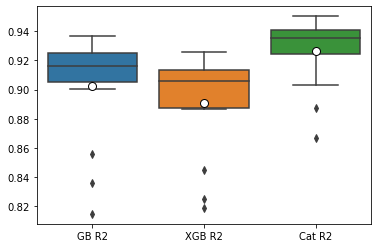

In [21]:
sns.boxplot(data=box2[['GB R2', 'XGB R2', 'Cat R2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [22]:
box2.describe()

,GB R2,test_neg_mae,GB MAE,XGB R2,test_neg_mae,XGB MAE,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.902653,-13807.032673,13807.032673,0.891012,-14926.542396,14926.542396,0.926641,-12130.800899,12130.800899
std,0.036771,740.189274,740.189274,0.034387,857.760419,857.760419,0.023523,754.331560,754.331560
min,0.814652,-15435.841046,12752.331128,0.818443,-16530.938908,13837.085294,0.866493,-14002.878030,10996.331917
25%,0.905058,-14113.952413,13454.312040,0.887540,-15179.244521,14426.030300,0.924479,-12417.207216,11579.227135
50%,0.916486,-13567.315934,13567.315934,0.905740,-14598.583735,14598.583735,0.935673,-12130.609562,12130.609562
75%,0.924844,-13454.312040,14113.952413,0.913555,-14426.030300,15179.244521,0.940953,-11579.227135,12417.207216
max,0.936874,-12752.331128,15435.841046,0.925821,-13837.085294,16530.938908,0.950324,-10996.331917,14002.878030


In [23]:
box2.to_csv('Non-Linear.csv', index=False)